## **e22cseu0046** cv lab 2

In [4]:
# prompt: upload image

from google.colab import files
uploaded = files.upload()


Saving Lena_Image.png to Lena_Image.png


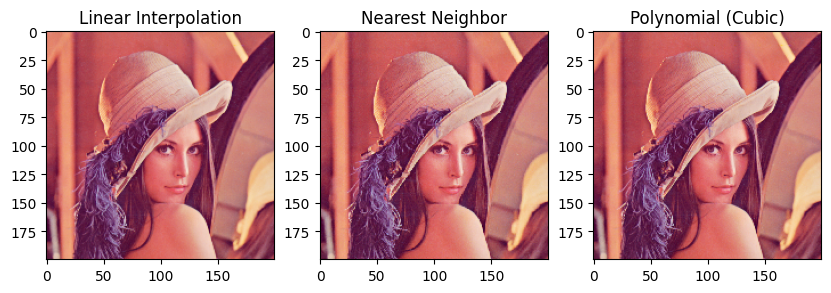

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/Lena_Image.png')

# Resize using different interpolation methods
linear_resized = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
nearest_resized = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
poly_resized = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

# Display results
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(linear_resized, cv2.COLOR_BGR2RGB)); plt.title("Linear Interpolation")
plt.subplot(1, 3, 2); plt.imshow(cv2.cvtColor(nearest_resized, cv2.COLOR_BGR2RGB)); plt.title("Nearest Neighbor")
plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(poly_resized, cv2.COLOR_BGR2RGB)); plt.title("Polynomial (Cubic)")
plt.show()


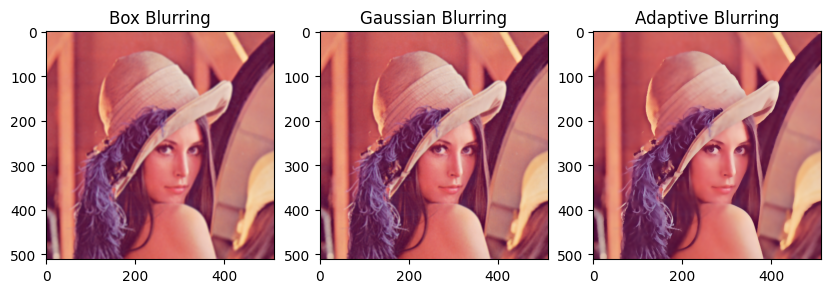

In [12]:
# Box Blur
box_blur = cv2.blur(image, (5, 5))

# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Adaptive Blur (Bilateral Filter)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

# Display results
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1); plt.imshow(cv2.cvtColor(box_blur, cv2.COLOR_BGR2RGB)); plt.title("Box Blurring")
plt.subplot(1, 3, 2); plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)); plt.title("Gaussian Blurring")
plt.subplot(1, 3, 3); plt.imshow(cv2.cvtColor(adaptive_blur, cv2.COLOR_BGR2RGB)); plt.title("Adaptive Blurring")
plt.show()



=== SVM ===
Accuracy: 0.9611
Precision: 0.9972
Recall: 0.9583
F1 Score: 0.9773
Cross-Validation Accuracy: 0.9794
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 1 27  0  0  0  0  0  0  0  0]
 [ 1  0 32  0  0  0  0  0  0  0]
 [ 1  0  0 33  0  0  0  0  0  0]
 [ 1  0  0  0 45  0  0  0  0  0]
 [ 1  0  0  0  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 2  0  0  0  0  0  0 32  0  0]
 [ 2  0  0  0  0  0  0  0 28  0]
 [ 3  0  0  0  0  0  0  0  0 37]]


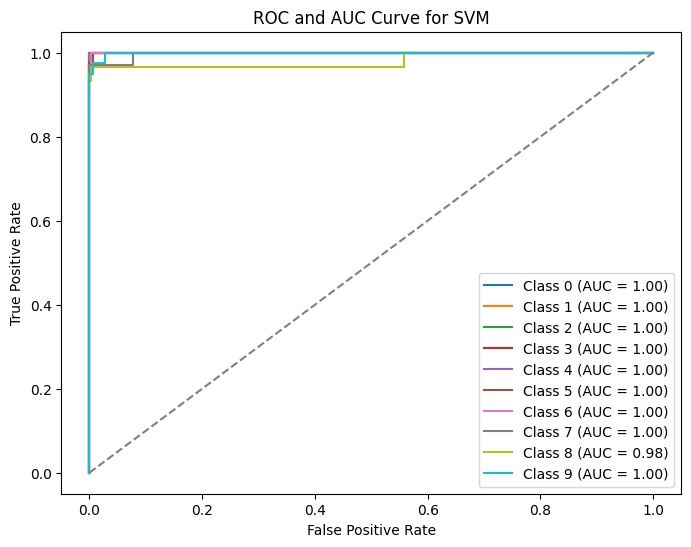


=== Neural Network ===
Accuracy: 0.9722
Precision: 0.9861
Recall: 0.9750
F1 Score: 0.9804
Cross-Validation Accuracy: 0.9800
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 1 27  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 2  0  1  0  0 43  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 1  0  0  0  0  0  0  0 29  0]
 [ 1  0  0  0  0  0  0  0  0 39]]


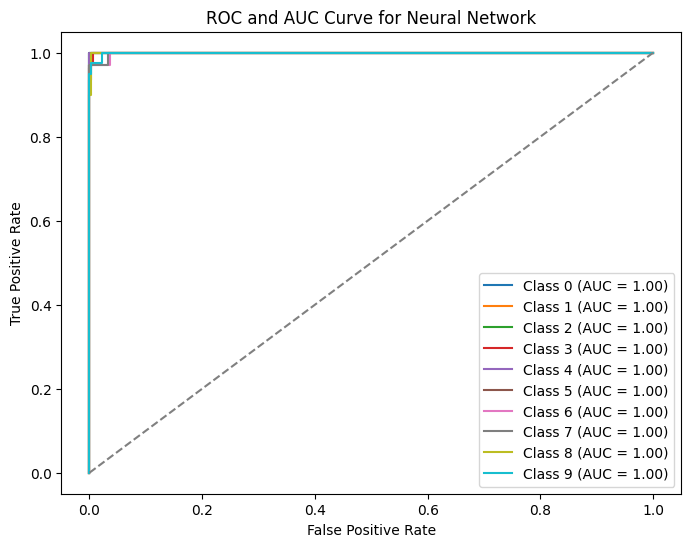

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

# Load MNIST Dataset
digits = load_digits()
X = digits.images.reshape(len(digits.images), -1)  # Flatten 28x28 images to 1D (784 pixels)
y = digits.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Binarize labels for multi-class ROC computation
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Define models (Using One-vs-Rest for Multi-Class ROC)
models = {
    "SVM": OneVsRestClassifier(SVC(kernel='rbf', probability=True)),
    "Neural Network": OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500))
}

# Perform K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through models
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_score = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)

    # Cross-validation accuracy
    cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()

    # Metrics
    acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Confusion Matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    # Print metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Cross-Validation Accuracy: {cv_accuracy:.4f}")
    print("Confusion Matrix:\n", cm)

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for all classes
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC and AUC Curve for {name}')
    plt.legend()
    plt.show()
